# Import Libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas.api.types as pdtypes

from matplotlib import pyplot as plt
import seaborn as sb

# Read And Understand The Data

In [92]:
df_train = pd.read_csv('data/train.csv')

In [3]:
display(df_train.describe())

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [12]:
for c in df_train.columns:
    if pd.api.types.is_object_dtype(df_train[c].dtype):
        print("%s:%s" % (c ,df_train[c].unique()))

MSZoning:['RL' 'RM' 'C (all)' 'FV' 'RH']
Street:['Pave' 'Grvl']
Alley:[nan 'Grvl' 'Pave']
LotShape:['Reg' 'IR1' 'IR2' 'IR3']
LandContour:['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:['AllPub' 'NoSeWa']
LotConfig:['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:['Gtl' 'Mod' 'Sev']
Neighborhood:['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1:['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2:['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType:['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl:['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st:['VinylSd' 'MetalSd'

# Data Encoding And Visualization

We have a lot of categorical columns. Before we attempt to predict any values, we need to identify which columns have a strong relationship to the sales price.

The first way to get this idea is to draw a heatmap from the columns correlation matrix. However, a correlation matrix cannot be created from categorical data - only from ordinal data. As a result, the exisitng categorical coulmns need to be transformed into ordinal values using the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) from the **scikit-learn** library.

In [30]:
encoder = LabelEncoder()
df_train_corr = df_train.copy()
for c in df_train_corr.columns:
    if pdtypes.is_object_dtype(df_train_corr[c].dtype):
        df_train_corr[c] = encoder.fit_transform(df_train_corr[c])

<Axes: >

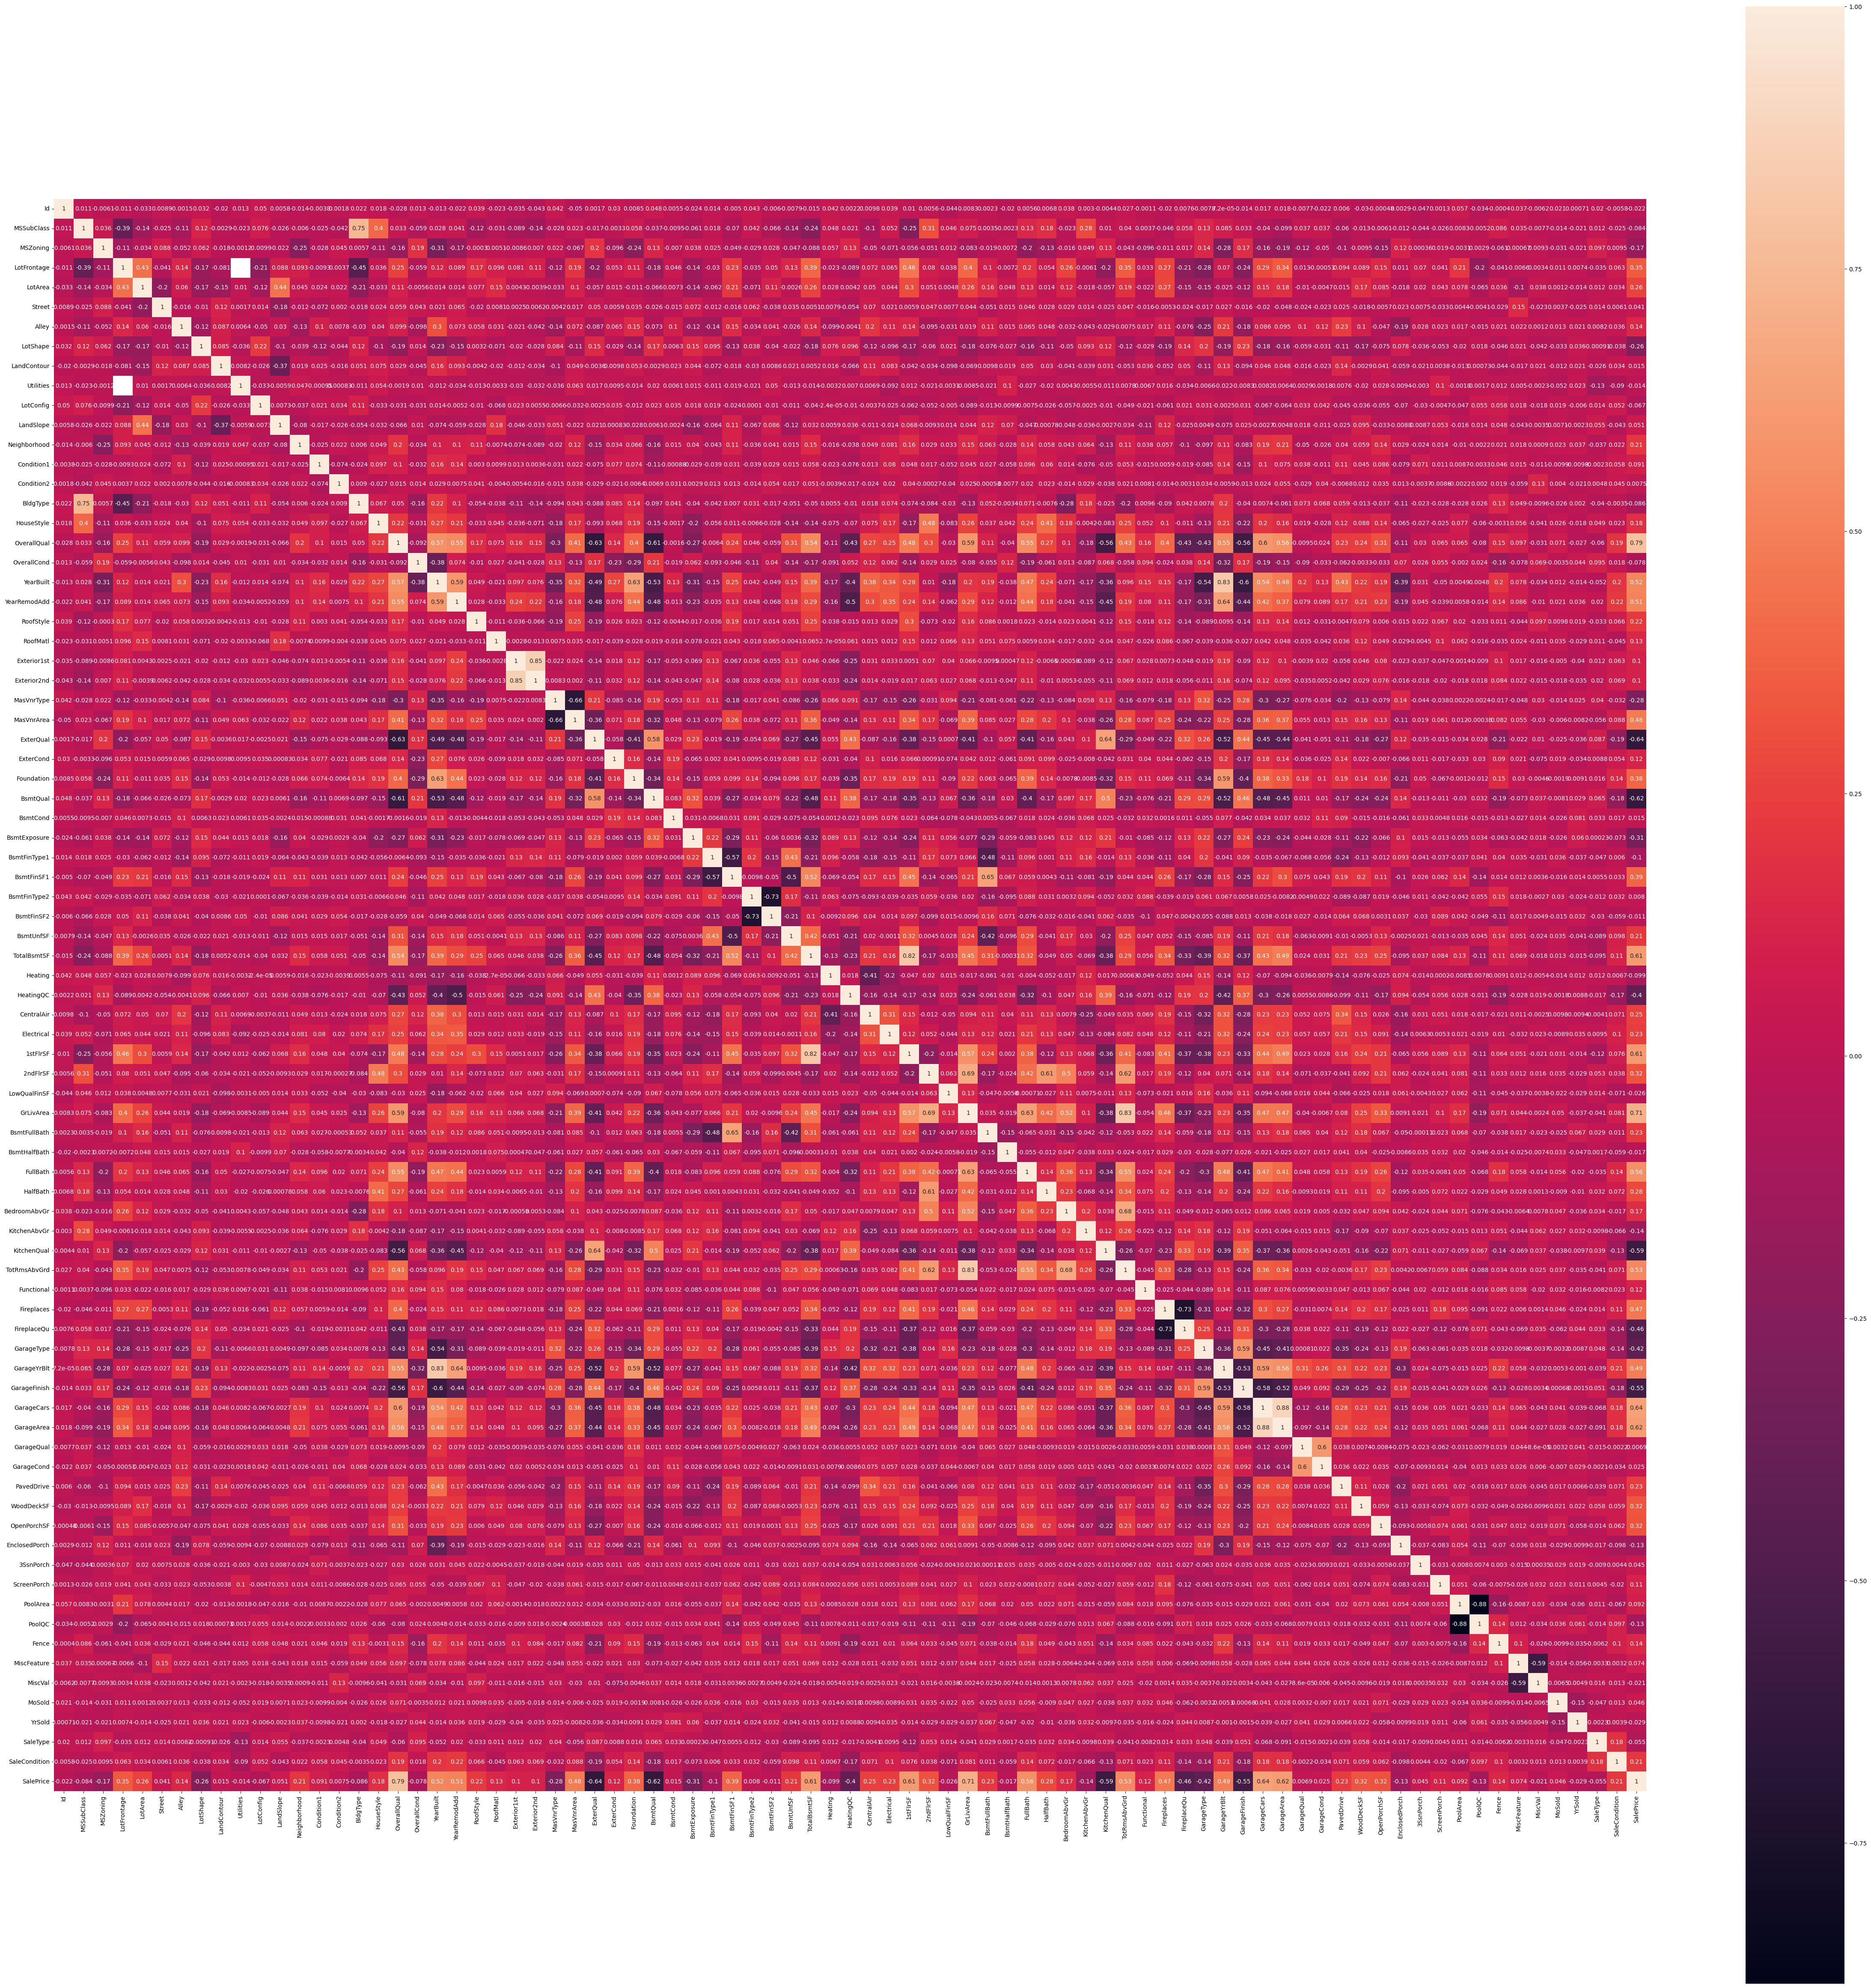

In [36]:
#correlation matrix
corrmat = df_train_corr.corr()
fig = plt.figure(figsize=(60, 60))
ax = fig.add_subplot()
sb.heatmap(corrmat, vmax=1.0, square=True, ax=ax, annot=True)

Open the above image and look at the last row - it shows the correlation between `SalePrice` and the remaining columns.

From the row, I have done a first pass to identify the columns that could be the strongest predictors of the house price.

I have included columns that are areound ~0.5 and higher (including some columns that are a little below the 0.5 correlation mark).

Below, I have plotted only those columns. I now look for columns that exhibit multicollinearity in order to remove columns that are in essence "duplicate".

<Axes: >

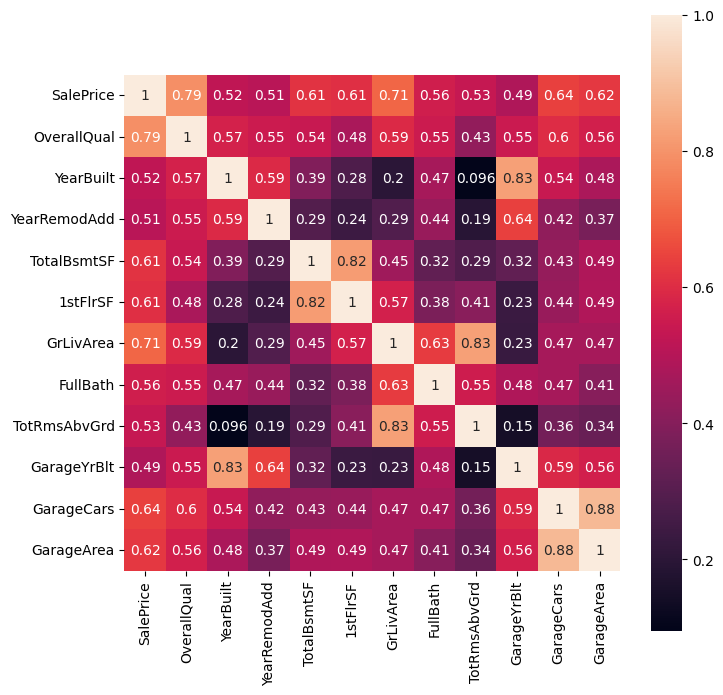

In [46]:
columns = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']

corrmat = df_train_corr.loc[:, columns].corr()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sb.heatmap(corrmat, vmax=1.0, square=True, ax=ax, annot=True)

From the above heatmap, the following strong relationships are visible amoung the other columns:
- `GarageArea` and `GarageCars` - ultimately, the area of the garage indicates how many cars can fit into it. We will keep only the `GarageCars` index as it is a stronger indicator of the `SalePrice` (`0.64` as opposed to the `0.62` of the `GarageArea` feature). It also makes sense in practical terms as house buyers are interested in the number of cars they can fit in a garage, as the square meters is not that easy to reason.
- `YearBuilt` and `GarageYrBlt` - in practical terms, a garage and a house are mostly built together. Of the 2, `YearBuilt` is a stronger indicator and only it will be kept.
- `1stFlrSF` and `TotalBsmtSF` - the basements area is traditionally based the area of the ground floor. These two are strongly related and also have the same correlation index with the `SalePrice`. Only `1stFlrSF` will be kept.
- `TotRmsAbvGrd` is also strongly correlated to `GrLivingArea`. Here, `GrLivingArea`is the stronger predictor and only it is kept.

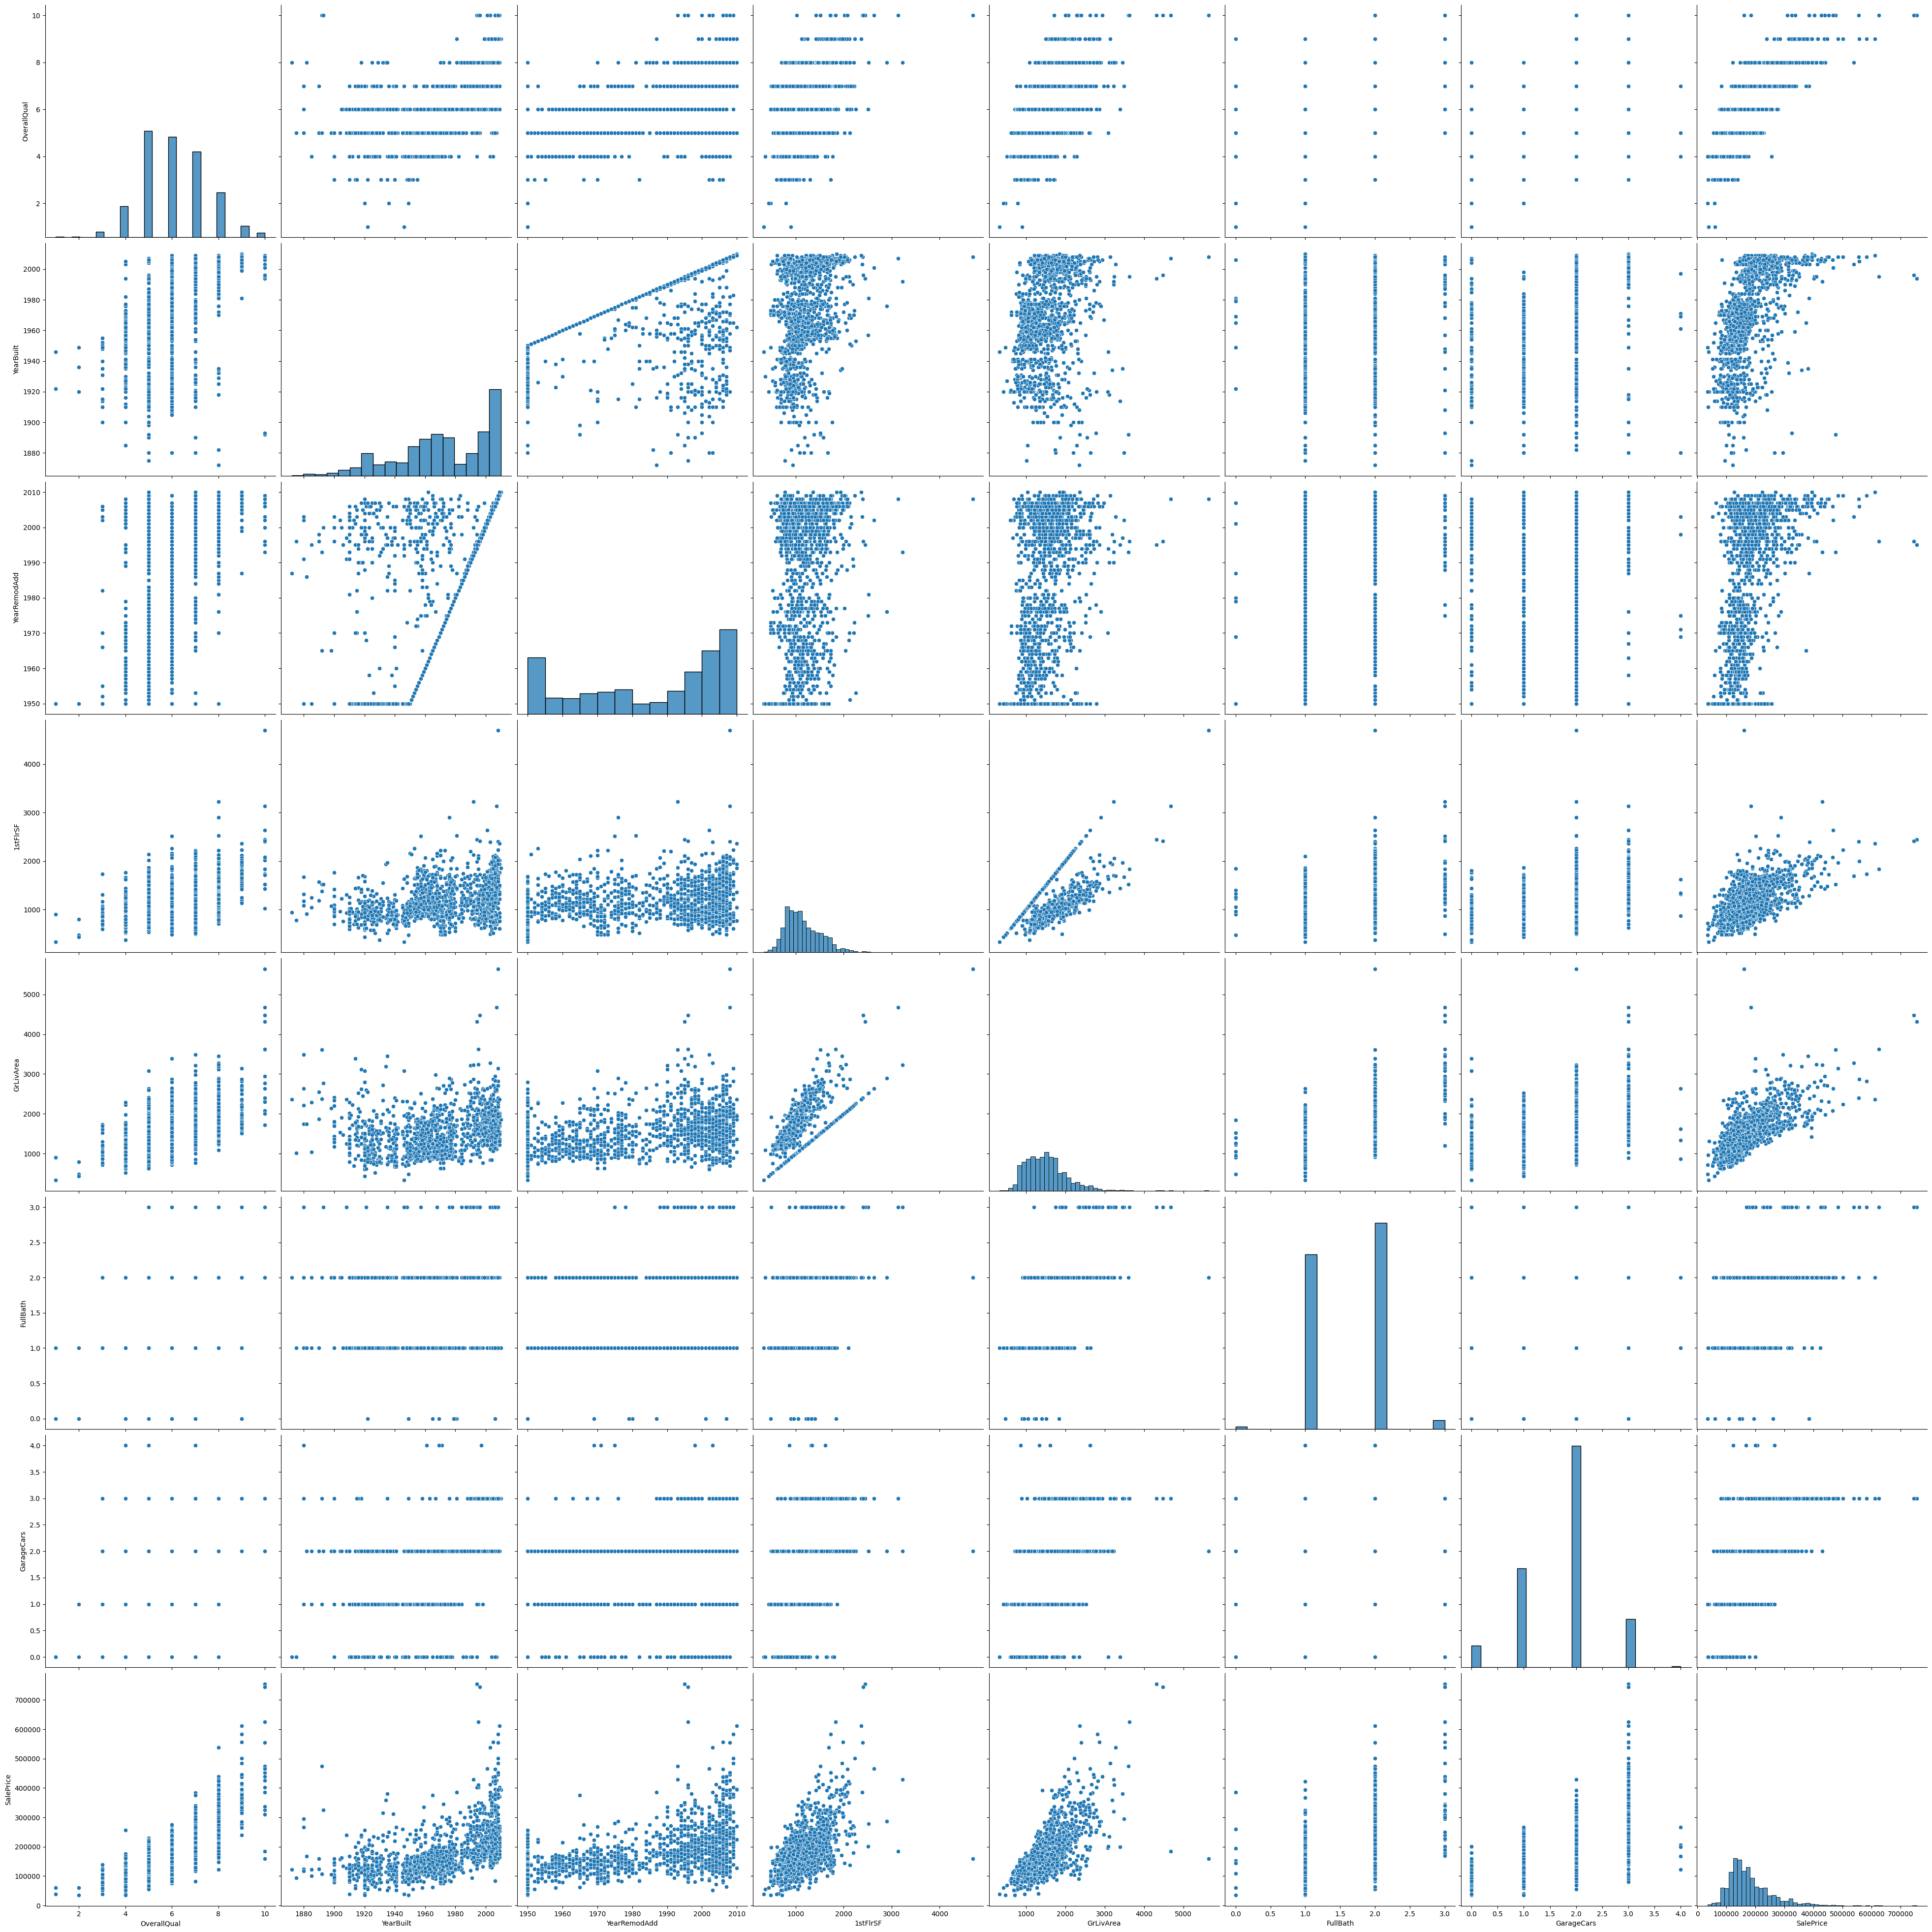

In [102]:
columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']

sb.pairplot(df_train[columns], height = 5)

# Handle Missing Data

In [55]:
df_train[columns].isna().sum()

SalePrice       0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
GarageCars      0
dtype: int64

In [56]:
df_train[columns].isnull().sum()

SalePrice       0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
GarageCars      0
dtype: int64

There are no missing values for the selected columns.

# Data Standartization

The columns need to be normalized before analysis.

Each column is plotted as-is to understand if it has a normal distribution.

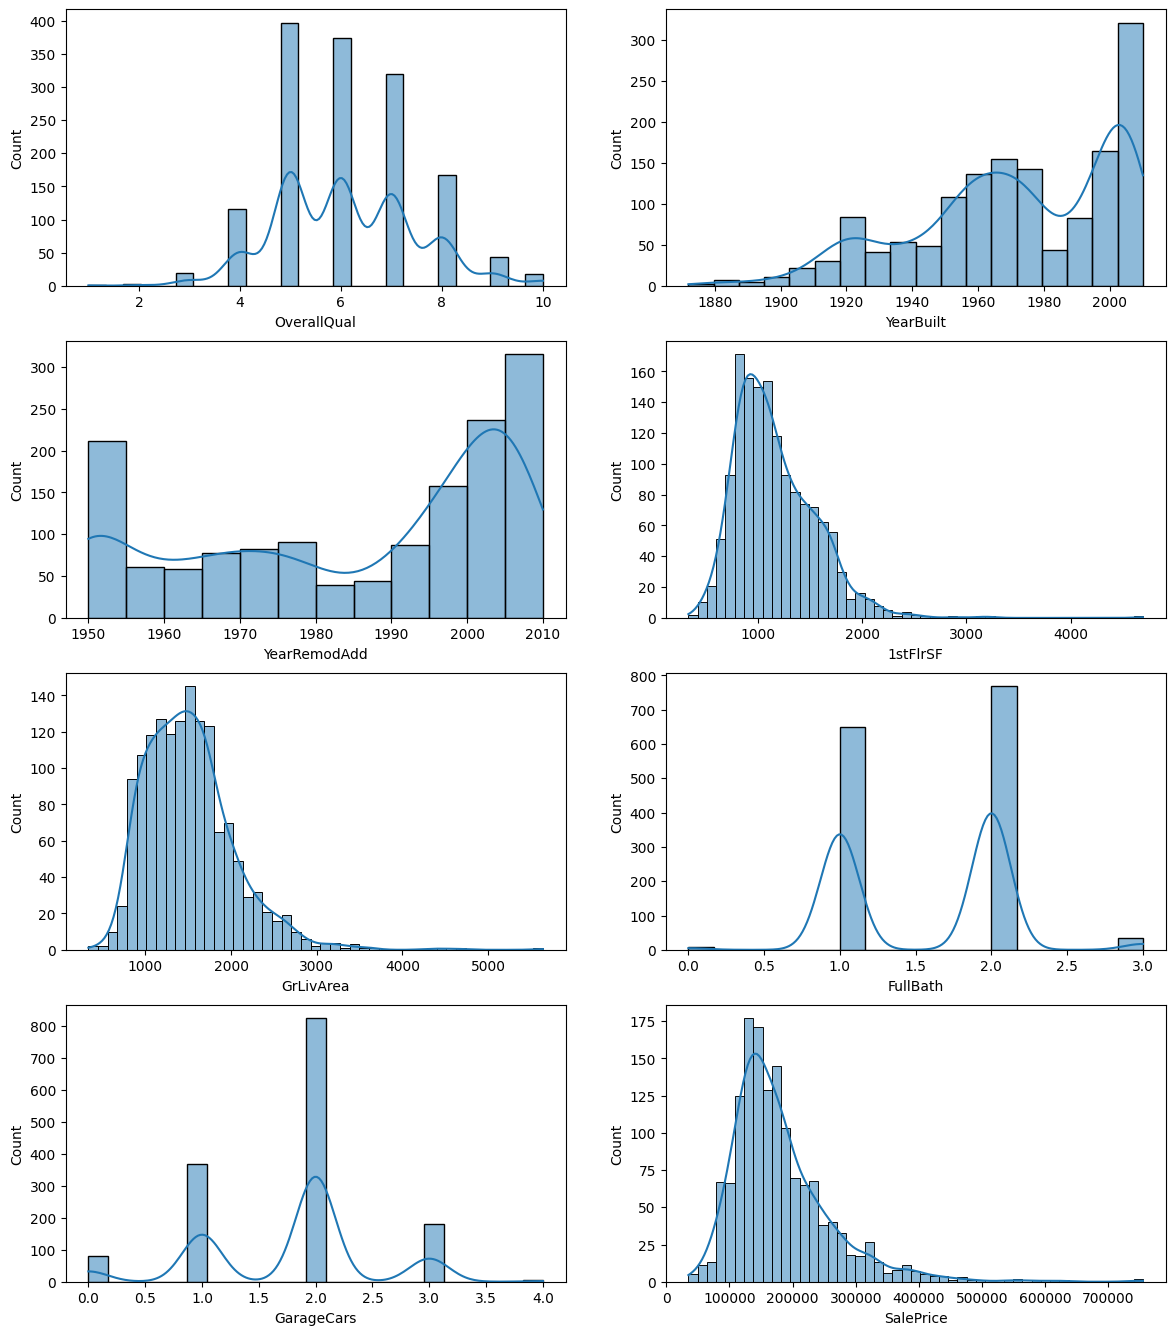

In [103]:
fig = plt.figure(figsize=(10, 10))
for i, c in enumerate(columns):
    ax = fig.add_subplot(len(columns), 2, i + 1)
    plt.subplots_adjust(bottom=-1.8, right=0.8, top=0.8, left=-0.3)
    sb.histplot(df_train, x=c, kde=True, ax=ax)

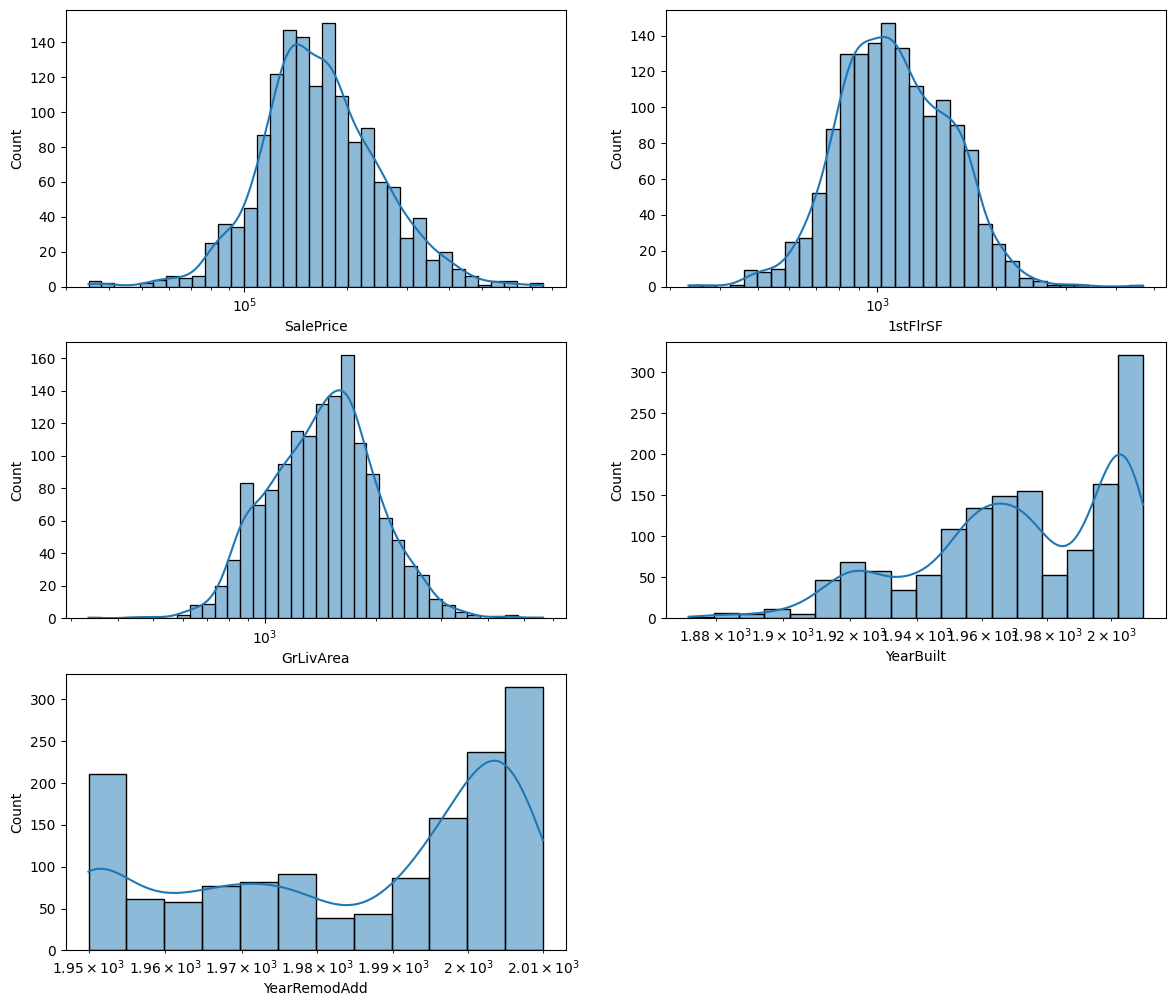

In [80]:
fig = plt.figure(figsize=(10, 10))

for i, c in enumerate(['SalePrice', '1stFlrSF', 'GrLivArea', 'YearBuilt', 'YearRemodAdd']):
    ax = fig.add_subplot(len(columns), 2, i + 1)
    plt.subplots_adjust(bottom=-1.8, right=0.8, top=0.8, left=-0.3)
    sb.histplot(df_train, x=c, kde=True, ax=ax, log_scale=True)

# Analysis For Top Predictors

In [110]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

data = df_train[columns].copy()
kf = KFold(n_splits=5, random_state=100, shuffle=True)
model = XGBRegressor(n_estimators=300)
mse_arr = []

for (train, test) in kf.split(data):
    X_train = data.iloc[train, :-1]
    y_train = np.log1p(data.loc[train, 'SalePrice'])
    
    X_test = data.iloc[test, :-1]
    y_test = np.log1p(data.loc[test, 'SalePrice'])
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_arr.append(mean_squared_error(y_test, y_pred))

mse_mean = np.array(mse_arr).mean()
print("MSE: %f" % mse_mean)

MSE: 0.032450
